**Importar librerías**

In [1]:
# Importar las bibliotecas necesarias
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
#from tensorflow.keras.callbacks import TensorBoard
import random
import math
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

**Cargar datasets**

In [2]:
#Función para cargar datasets
def load_data(folder_path, label):
    data = []
    for file in os.listdir(folder_path):
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            image_path = os.path.join(folder_path, file)
            image_array = Image.open(image_path)
            image_array = np.array(image_array)

            # Data augmentation
            flipped_image = cv2.flip(image_array, 1)
            brightness_factor = 1.5
            brightened_image = cv2.addWeighted(image_array, brightness_factor, np.zeros_like(image_array), 0, 0)

            data.append((image_array, label))
            data.append((flipped_image, label))
            data.append((brightened_image, label))
    return data

In [3]:
good_pastries_folder = '../../Datasets/Pasteles/Buenos'
bad_pastries_folder = '../../Datasets/Pasteles/Malos'

good_data = load_data(good_pastries_folder, 1)
bad_data = load_data(bad_pastries_folder, 0)
data = good_data + bad_data
random.shuffle(data)

**Limpieza de datos**

In [4]:
TAM_IMAGE = 200
processed_data = []

for image, label in data:
    image = cv2.resize(image, (TAM_IMAGE, TAM_IMAGE))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(TAM_IMAGE, TAM_IMAGE, 1)
    processed_data.append([image, label])


In [5]:
# Convertir imágenes y etiquetas en arrays numpy separados
images = np.array([image for image, label in processed_data])
labels = np.array([label for image, label in processed_data])

**Normalización y división de los datos**

In [6]:
x = images.astype(float) / 255
y = labels
x_train, x_val, y_train, y_val = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42
)

**Tamaño de arrays de Entrenamiento y Validación**

In [7]:
len(x_train)

223

In [8]:
len(x_val)

56

**RED NEURONAL CONVOLUCIONAL MEJORADA**

In [52]:
modeloCNN =""

In [53]:
history=""

In [54]:
#BATCH_SIZE = 32
# TAM_IMAGE = 200 (Declarado más arriba)
modeloCNN = tf.keras.models.Sequential([
    # Capa de entrada
    #InputLayer(batch_input_shape=(BATCH_SIZE, TAM_IMAGE, TAM_IMAGE, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(TAM_IMAGE, TAM_IMAGE, 1)),
    tf.keras.layers.BatchNormalization(name='batch_normalization_1'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(name='batch_normalization_2'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(name='batch_normalization_3'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00053),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [55]:
history = modeloCNN.fit(
    x_train, y_train, batch_size=14,  # Ajusta el tamaño del lote según tus necesidades
    validation_data=(x_val, y_val),
    epochs=35,  # Reducido para evitar sobreajuste en caso necesario
    verbose=1
)

Epoch 1/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6148 - loss: 16.0167 - val_accuracy: 0.8929 - val_loss: 0.3903
Epoch 2/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7854 - loss: 7.0416 - val_accuracy: 0.2143 - val_loss: 6.8901
Epoch 3/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8959 - loss: 3.5323 - val_accuracy: 0.2143 - val_loss: 12.5631
Epoch 4/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8360 - loss: 4.7946 - val_accuracy: 0.2143 - val_loss: 5.0170
Epoch 5/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8954 - loss: 1.4147 - val_accuracy: 0.2143 - val_loss: 6.8388
Epoch 6/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9486 - loss: 0.8105 - val_accuracy: 0.2143 - val_loss: 13.2104
Epoch 7/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9870 - loss: 0.1139 - val_accuracy: 0.2143 - val_loss: 16.7315
Epoch 8/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9836 - loss: 0.1557 - val_accuracy: 0.2143 - val_l

In [48]:
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(accuracy_values) + 1)

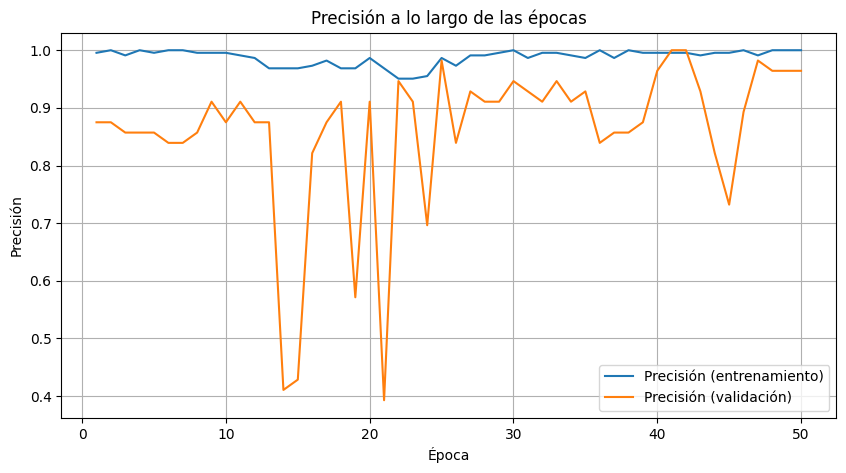

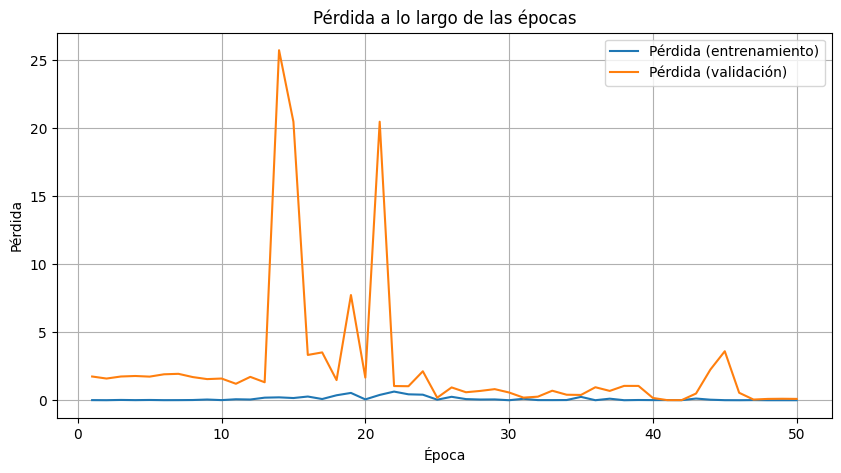

In [49]:
# Graficar la precisión
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy_values, label='Precisión (entrenamiento)')
plt.plot(epochs, val_accuracy_values, label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión a lo largo de las épocas')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la pérdida
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, label='Pérdida (entrenamiento)')
plt.plot(epochs, val_loss_values, label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida a lo largo de las épocas')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
test_loss, test_accuracy = modeloCNN.evaluate(x_val, y_val)

print(f'Porcentaje de efectividad en el conjunto de prueba: {test_accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.9658 - loss: 0.1023
Porcentaje de efectividad en el conjunto de prueba: 96.43%


In [51]:
#modeloCNN.save('../AICC9.h5')

In [15]:
#modeloCNN3.save('AICC4_95_65.keras')

In [16]:
#!mkdir carpeta_salida